In [80]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
os.chdir('C:\\Users\\zain\\OFSTED Data for Assignment')
df = pd.read_excel('Combined OFSTED data.xlsx')


In [81]:
#Question 1
df = df[df.Rating != 'Unknown']
df['Rating'] = df['Rating'].replace(['Inadequate','Requires Improvement','Satisfactory'],'Not Good')


In [82]:
df.Rating.value_counts()/4585*100

Good           59.302072
Not Good       22.508179
Outstanding    18.189749
Name: Rating, dtype: float64

In [83]:
#Question 2 
#baseline accuracy
# mode of rating column
df.Rating.mode()
#We choose mode value for baseline accuracy.In our case the mode is 'Good' and it occurs 59.30% in the dataset.
#so we can say that our baseline accuracy is 59.30%

0    Good
dtype: object

In [84]:
df = df.dropna()
#cols =[ 'PPERSABS10','P8PUP', 'ATT8SCR', 'P8MEA', 'P8CILOW', 'P8CIUPP', 'EBACCAPS',       'PTL2BASICS_94', 'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'PTEBACC_94',       'PTEBACC_95', 'PT5EM_94', 'P8_BANDING', 'OVERALL_DESTPER',       'NOT_SUSTAINEDPER', 'UNKNOWNPER', 'OVERALL_DESTPER_DIS',       'NOT_SUSTAINEDPER_DIS', 'UNKNOWNPER_DIS', 'Rating']
#df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')



In [85]:
df = df.replace(to_replace ="SUPP",value ="0")
df = df.replace(to_replace ="SP",value ="0.5")
df = df.replace(to_replace ="NE",value ="0")
df = df.replace(to_replace ="LOWCOV",value ="0")
#df = df.fillna(0)


In [86]:
df1_y = df['Rating']
df1_x = df.drop(columns=['Rating','URN','GENDER','RELCHAR','LA','PNUMFSM'])
df1_x

,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PERCTOT,PPERSABS10,...,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS
3,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,6.9,18.8,...,0.191,0.141,0.533,3,0.9,0.09,0.01,0.89,0.11,0.01
4,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,5.3,12.5,...,0.417,0.326,0.749,1,0.94,0.04,0.02,0.95,0.04,0.01
5,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,6.7,19.2,...,0.201,0.071,0.526,3,0.86,0.08,0.05,0.85,0.09,0.06
6,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,5.4,14,...,0.240,0.120,0.570,3,0.91,0.08,0.01,0.87,0.13,0
7,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,6.3,18.5,...,0.368,0.265,0.625,3,0.95,0.04,0.01,0.9,0.07,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,45.7,54.3,3.4,14.5,47.2,45.4,7.5,55.7,7.6,26.4,...,0.035,0.009,0.395,3,0.9,0.07,0.02,0.88,0.09,0.03
5660,54.7,45.3,1.0,13.7,1.1,98.6,0.4,27.6,4.8,10.1,...,0.138,0.090,0.517,4,0.92,0.07,0.01,0.82,0.16,0.02
5661,45.8,54.2,1.2,10.4,39.6,59.0,1.4,34.3,5.2,13.8,...,0.128,0.080,0.516,3,0.91,0.08,0.01,0.8,0.17,0.03
5743,52.2,47.8,3.7,19.7,2.2,97.8,0.0,54.5,10.1,27.5,...,0.115,0.067,0.356,5,0.84,0.15,0.01,0.81,0.19,0


Running different machine learning models
K-Nearest Neighbour


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1_x, df1_y, test_size=0.20)

#KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


[[268  32  19]
 [ 86  36   2]
 [ 72   3  31]]
              precision    recall  f1-score   support

        Good       0.63      0.84      0.72       319
    Not Good       0.51      0.29      0.37       124
 Outstanding       0.60      0.29      0.39       106

    accuracy                           0.61       549
   macro avg       0.58      0.47      0.49       549
weighted avg       0.60      0.61      0.58       549



0.6102003642987249

Naïve Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


[[164 118  37]
 [ 34  88   2]
 [ 43   0  63]]
              precision    recall  f1-score   support

        Good       0.68      0.51      0.59       319
    Not Good       0.43      0.71      0.53       124
 Outstanding       0.62      0.59      0.61       106

    accuracy                           0.57       549
   macro avg       0.58      0.61      0.57       549
weighted avg       0.61      0.57      0.58       549



0.5737704918032787

Logistic Regression 

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score

cf_matrix = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


[[276  28  15]
 [ 80  44   0]
 [ 54   0  52]]
              precision    recall  f1-score   support

        Good       0.67      0.87      0.76       319
    Not Good       0.61      0.35      0.45       124
 Outstanding       0.78      0.49      0.60       106

    accuracy                           0.68       549
   macro avg       0.69      0.57      0.60       549
weighted avg       0.68      0.68      0.66       549



C:\Users\ngupta97\Desktop\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6775956284153005

#Question4 
Creating the confusion matrix

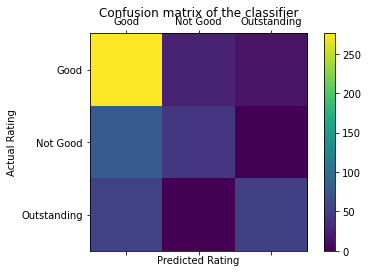

In [90]:
labels = ['Good', 'Not Good','Outstanding']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.show()


#Question 5
We find that there are some features of P8 score having negative values
We will treat those features by transforming using min max scaler


In [91]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler = MinMaxScaler()
normData = pd.DataFrame(scaler.fit_transform(df1_x), index=df1_x.index, columns=df1_x.columns)
df1_x = normData

#Question 6
-The first option is using get dummies and creating one hot encoding for each value that is present in the GENDER column
- Another option is assigning values to each value present in GENDER column , eg 1- Mixed , 2 - Mixed , 3 - Boys

#question 7 

-we have merged all the religious values into one category

#Question 8,9,10,11 have been covered


In [92]:
df1_x = df1_x.merge(df[['GENDER','RELCHAR']], left_index=True, right_index=True)


df1_x['RELCHAR'] = df1_x['RELCHAR'].replace(['Church of England','Roman Catholic','Christian','Muslim','Islam','Jewish','Anglican','Plymouth Brethren Christian Church','Methodist','Catholic','Church of England/Roman Catholic','Orthodox Jewish','Quaker','Roman Catholic/Church of England','Sikh','Anglican/Christian','Christian/Evangelical','Church of England/Christian','Church of England/Evangelical','Hindu','Anglican/Church of England','Anglican/Evangelical','Protestant/Evangelical','Charadi Jewish','Christian Science','Multi-faith','Christian/Methodist','United Reformed Church','Free Church','Roman Catholic/Anglican','Greek Orthodox','Seventh Day Adventist','Protestant','Sunni Deobandi','Church of England/Methodist','Christian/non-denominational'],'Not Religious')

df1_x = pd.get_dummies(df1_x, columns=['GENDER','RELCHAR'])


In [93]:
#Running the model again with new one hot encoded features
#Run 2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1_x, df1_y, test_size=0.20)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
y_pred = logreg1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score

cf_matrix = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)


[[289  18  17]
 [ 72  41   0]
 [ 65   0  47]]
              precision    recall  f1-score   support

        Good       0.68      0.89      0.77       324
    Not Good       0.69      0.36      0.48       113
 Outstanding       0.73      0.42      0.53       112

    accuracy                           0.69       549
   macro avg       0.70      0.56      0.59       549
weighted avg       0.69      0.69      0.66       549



C:\Users\ngupta97\Desktop\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6867030965391621

#question 13

The main differences between the filter and wrapper methods for feature selection are:

-Filter methods measure the relevance of features by their correlation with dependent variable while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.
-Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.
-Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross validation.
-Filter methods might fail to find the best subset of features in many occasions but wrapper methods can always provide the best subset of features.
-Using the subset of features from the wrapper methods make the model more prone to overfitting as compared to using subset of features from the filter methods.


#Question 14

Filter methods:
-chi-square test
-correlation coefficient
-variance threshold


Variance Thresholds

Here, we simply compute the variance of each feature, and we select the subset of features based on a user-specified threshold. E.g., “keep all features that have a variance greater or equal to x” or “keep the the top k features with the largest variance.” We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.


Correlation Coefficient

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

Chi-squared Score
This is another statistical method that’s commonly used for testing relationships between categorical variables.
Therefore, it’s suited for categorical variables and binary targets only, and the variables should be non-negative and typically boolean, frequencies, or counts.
What it does is simply compare the observed distribution between various features in the dataset and the target variable.




In [94]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# change this to how much features you want to keep from the top ones.
select_k = 25

# apply the chi2 score on the data and target (target should be binary).  
selection = SelectKBest(chi2, k=select_k).fit(X_train, y_train)

# display the k selected features.
features = X_train.columns[selection.get_support()]
print(features)


Index(['PSENELSE', 'PSENELK', 'PNUMEAL', 'PNUMFSMEVER', 'PERCTOT',
       'PPERSABS10', 'ATT8SCR', 'P8MEA', 'P8CILOW', 'P8CIUPP', 'EBACCAPS',
       'PTL2BASICS_94', 'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'PTEBACC_94',
       'PTEBACC_95', 'PT5EM_94', 'P8_BANDING', 'NOT_SUSTAINEDPER',
       'NOT_SUSTAINEDPER_DIS', 'GENDER_Boys', 'GENDER_Girls', 'GENDER_Mixed',
       'RELCHAR_Does not apply', 'RELCHAR_Not Religious'],
      dtype='object')


In [95]:
df_new = df1_x[features]

In [96]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1_x, df1_y, test_size=0.20)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
y_pred = logreg1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score

cf_matrix = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)


[[283  24  27]
 [101  37   0]
 [ 45   1  31]]
              precision    recall  f1-score   support

        Good       0.66      0.85      0.74       334
    Not Good       0.60      0.27      0.37       138
 Outstanding       0.53      0.40      0.46        77

    accuracy                           0.64       549
   macro avg       0.60      0.51      0.52       549
weighted avg       0.63      0.64      0.61       549



C:\Users\ngupta97\Desktop\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.639344262295082

#Question 15 
Wrapper method
Recursive Feature Elimination (RFE)
RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.



In [97]:
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1_x, df1_y, test_size=0.20)
rfe = RFE(logreg1, 25)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
y_pred = rfe.predict(X_test)



C:\Users\ngupta97\Desktop\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\ngupta97\Desktop\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ngupta97\Desktop\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

[False  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True False False  True  True  True False False False False False]
[ 6  1  1  2  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1 10  1  1  1  1
  1  1 12  4  1  1  1 11  5  7  9  8]


C:\Users\ngupta97\Desktop\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score

cf_matrix = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

[[288  20  21]
 [ 80  45   2]
 [ 48   0  45]]
              precision    recall  f1-score   support

        Good       0.69      0.88      0.77       329
    Not Good       0.69      0.35      0.47       127
 Outstanding       0.66      0.48      0.56        93

    accuracy                           0.69       549
   macro avg       0.68      0.57      0.60       549
weighted avg       0.69      0.69      0.67       549



0.6885245901639344